# TP 9: Conditions de dirichlet et éléments finis en 2D pour l'équation de la chaleur

Dans ce TP, on commence par s'intérésser au problème stationnaire suivant, avec conditions aux limites de Dirichlet :

$$
\left\{\begin{aligned}
&-\textrm{div}(\sigma\nabla T)+T=S,\ \textrm{dans }\Omega,\\
&T=T_f, \textrm{sur }\partial\Omega
\end{aligned}
\right.
$$
où la source $S$ est une fonction régulière donnée, la valeur au bord $T_f,$ supposée constante, est donnée, et où $\sigma$ est une fonction régulière vérifiant $\sigma(x,y)\ge\sigma_m>0,\ \forall (x,y)\in\Omega.$ L'ensemble $\Omega$ est un ouvert à frontière polygonale de $\mathbb{R}^2$. 

**Q1)**
Si on pose $u=T-T_f,$ déterminer $f$ tel que $u$ est solution du problème avec conditions aux limites homogènes
$$
(P)\left\{\begin{aligned}
&-\textrm{div}(\sigma\nabla u)+u=f,\ \textrm{dans }\Omega,\\
&u=0, \textrm{sur }\partial\Omega
\end{aligned}
\right.
$$
Écrire la formulation variationnelle du problème $(P)$ sous la forme 
\begin{equation*}
(Pv)\ \ \ 
\begin{cases}
u\in V  \,\textrm{tel que}\\
a(v,u)=L(v),\ \,\forall\ v\in V ,
\end{cases}
\end{equation*}
où $V=H^1_0(\Omega)$, $a$ est une forme bilinéaire dans $V$  et $L$ une forme linéaire de $V,$ que l'on explicitera. On peut montrer que le problème $(Pv)$ admet une unique solution.

On reprend les notations du tp7. 
Soit $T_h$ une triangulation du domaine $\Omega$ et $V_h$ l'approximation de $H^1(\Omega)$ par des éléments finis $P^1$ associés à la triangulation $T_h.$ On note $\{T_N\}_{N=1,\dots,Ntri}\ $ les triangles de $T_h,$ $\{S_I\}_{I=1,\dots,NSom}\ $ les sommets de la triangulation et $\{\Phi_I\}_{I=1,\dots,NSom}\ $ les fonctions de la base de $V_h$ définies par $\Phi_I(S_J)=\delta_{IJ},\ I,J=1,\dots,NSom.$ 

Pour obtenir une approximation de $H^1_0$ on devrait considérer uniquement les noeuds de la triangulation qui sont intérieurs au domaine $\Omega$ et chercher une solution approchée de la forme 
$$
u_h=\displaystyle{\sum_{I=1,S_I\in\textrm{int}(\Omega)}^{{NSom}}u_I\Phi_I}.
$$
Cette approche pose cependant des difficultés dans la construction des matrices de masse et de rigidité car elle implique différencier les triangles en fonction du nombre de noeuds intérieurs qu'ils contiennent et donc la taille des matrices élémentaires selon le type de triangle (touchant le bord ou pas).

Une alternative possible est d'assembler entièrement les matrices comme dans le cas de conditions aux limites de Neumann (comme dans le tp7) et ensuite modifier le système linéaire pour que la condition de Dirichlet soit vérifiée.

Supposons que la discrétisation par éléments finis $P^1$ du problème avec conditions aux limites de Neumann conduit au système linéaire 
$$
AU=F,
$$
$U=(u_1,\dots,u_{NSom})^T$ étant le vecteur des coordonnées de la solution approchée $u_h$ dans la base $\{\Phi_I\}_{I=1,\dots,NSom}$.
Pour prendre en compte la condition de Dirichlet, on procède alors comme suit :

Soit $I\in\{1,\dots,NSom\}$ tel que le noeud $S_I$ appartient au bord de $\Omega.$ On change alors la matrice $A$ et le second membre $F$ en posant
$$
A_{I,J}=A_{J,I}=
\begin{cases}
1,&J=I,\\
0,&J\neq I,
\end{cases}
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ F_I=0.
$$
Cette technique s'appelle de *pseudo-élimination*. Pour la mettre en place on doit référencer, dans la construction du maillage, les noeuds qui appartiennent au bord du domaine. 

**Q2)** Dans un premier temps on suppose que $\sigma(x,y)=1,\ \forall (x,y).$ Reprendre ce qui a été fait dans le tp7 et adapter au cas du problème avec conditions aux limites de Dirichlet homogènes. 



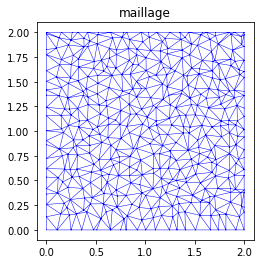

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri
import math
import numpy.random as rd


Nx=19
Ny=19

x_m=0.
x_M=2.
y_m=0.
y_M=2.

Rx=rd.random([Nx+2,Nx+2])
Rx[:,0]=0
Rx[:,-1]=0
Ry=rd.random([Ny+2,Ny+2])
Ry[0,:]=0
Ry[-1,:]=0

x=np.linspace(x_m,x_M,Nx+2)
y=np.linspace(y_m,y_M,Ny+2)

X,Y=np.meshgrid(x,y)

X=X+0.9*((x_M-x_m)/((Nx+2)))*Rx
Y=Y+0.9*((y_M-y_m)/((Ny+2)))*Ry

X=X.flatten()
Y=Y.flatten()

triang = tri.Triangulation(X, Y)

NTri=np.shape(triang.triangles)[0]
NSom=np.shape(triang.x)[0]

# A COMPLETER : construire un tableau avec les indices des sommets qui sont sur le bord. Utiliser np.logical_or, np.where 
#Frontiere = 
#indice = 

#Tableau avec coordonnes des noeuds
TabSom=np.zeros([NSom,3])
TabSom[:,0]=triang.x
TabSom[:,1]=triang.y
#TabSom[indice,2]=1

# Tableau avec noeuds des triangles
TabTri=triang.triangles

plt.figure(1)
plt.gca().set_aspect('equal')
plt.triplot(X,Y,triang.triangles, 'b-', lw=0.5)
plt.title('maillage')

plt.show()

# --- Construction des matrices elementaires

# a compléter
#def M_elem(S1,S2,S3):
    #...
    
#def K_elem(S1,S2,S3):
    #...

# --- Assemblage des matrices de masse et de rigidite

K = np.zeros([NSom,NSom])
M = np.zeros([NSom,NSom])
# A compléter    

# --- Construction du second membre
# A compléter

# --- Modification de la matrice et du second membre par la pseudo-élimination
# A compléter


**Q3)** On considère $f$ tel que la fonction
$$
u(x,y)=\sin(\pi x)\sin(\pi y)
$$
est solution du problème (P) dans $\Omega=[0,2]\times[0,2].$ 

Calculer la solution approchée donnée par la méthode des élements finis et la représenter. Calculer l'erreur entre la solution approchée et la solution exacte, en norme infinie. 

In [8]:
#plt.figure(2)
#plt.gca().set_aspect('equal')
#  #plt.tripcolor(triang, U, shading='flat')
#plt.tripcolor(triang.x,triang.y,triang.triangles, U, shading='flat')
#plt.colorbar()
#plt.title('solution approchée par EF P1')

#plt.show()

**Calcul des matrices élémentaires par passage à l'élément fini de référence**

Dans le cas où $\sigma$ est une foncion non constante, pour le calcul des matrices élémentaires on doit calculer des intégrales du type 
$$
\int_{T_k}\sigma(x,y)\nabla\Phi_i(x,y)\cdot\nabla\Phi_j(x,y)dxdy.
$$
Lorsque $\sigma$ est variable, il n'est pas toujours possible de calculer ces intégrales exactement. On approche alors ces intégrales par une formule de quadrature. Si celle-ci fait intervenir d'autres points que les sommets du traingle, il est plus simple d'abord de faire un changement de variables qui ramène le triangle $T_k$ au triangle de référence $T$ défini par les points $S^1=(0,0),\ S^2=(1,0)$ et $S^3=(0,1).$ 

Soit alors $T_k$ un triangle de sommets $S^1_k=(x_1,y_1),\ S^2_k=(x_2,y_2)$ et $S^3_k=(x_3,y_3).$ Déterminer une transformation affine $\varphi_k:\mathbb{R}^2\longrightarrow\mathbb{R}^2$ de la forme
$$
\varphi_k(x,y)=A_k(x,y)^T+B_k,\ \ \ \ A_k\in\mathcal{M}_2(\mathbb{R}),\ \ B_k\in\mathbb{R}^2
$$
telle que $\varphi_k(S^i)=S^i_k,\ i=1,2,3.$

On a alors, pour $S^i_k,\ S^j_k$ noeuds du triangle $T_k,$
$$
\int_{T_k}\phi_i\phi_j(X)dX=\int_T\hat{\phi_i}(\hat{X})\hat{\phi_j}(\hat{X})|\textrm{det}A_k|d\hat{X},
$$
$$
\int_{T_k}\sigma(X)\nabla\phi_i(X)\cdot\nabla\phi_j(X)dX=\int_T\sigma(\varphi_k(\hat{X}))(A_k^T)^{-1}\nabla\hat{\phi_i}(\hat{X})\cdot(A_k^T)^{-1}\nabla\hat{\phi_j}(\hat{X})|\textrm{det}A_k|d\hat{X},
$$
où $\hat{\phi_i}$ est la fonction chapeau associée au noeud $S^i$ du triangle de référence $T.$

Pour évaluer ces intégrales, on utilisera une formule de quadrature d'ordre 3 définie par
$$
\int_Tg(x,y)dxdy\approx\sum_{i=1}^4p_i g(Q_i),
$$ 
où 
$$
p_1=-\frac{27}{96},\ \ \ p_2=p_3=p_4=\frac{25}{96},
$$
$$
Q_1=\left(\frac13,\frac13\right),\ \ \ Q_2=\left(\frac15,\frac15\right),\ \ \ Q_3=\left(\frac15,\frac35\right),\ \ \ Q_4=\left(\frac35,\frac15\right).   
$$

Cette formule est exacte pour des polynômes de degré inférieur ou égal à 3 (vous pouvez le vérifier).

**Q4)** A l'aide de cette formule, modifier le calcul de la matrice de rigidité élémentaire. Valider le calcul pour un triangle quelconque dans le cas $\sigma=1.$

**Q5) Résolution numérique**

Valider d'abord votre code en calculant une solution connue. Pour cela, prendre une fonction $\sigma$ variable, prendre $u$ comme dans Q3 et calculer $f$ tel que $u$ est solution du problème $(P).$

Calculer ensuite une solution approchée avec les données suivantes :
$$
\sigma(x,y)=1+x+y,
$$ 
$$
S(x,y)=500e^{-\left(\frac{x-1}{0.8}\right)^2-\left(\frac{y-1}{0.8}\right)^2},
$$
$$
T_f=250.
$$




**Équation de la chaleur**

On s'intéresse maintenant à la solution $T(x,y,t)$ du problème
$$
(PC)\begin{cases}
\frac{\partial{T}}{\partial{t}}-\textrm{div}(\sigma\nabla T)=S,&\textrm{dans }\Omega\times]0,T^{max}],\\
T=T_f,&\textrm{sur }\partial\Omega\times]0,T^{max}],\\
T=T_0,&\textrm{dans }\Omega,\ \textrm{pour }t=0,
\end{cases}
$$
où $T_0=T_0(x,y)$ est la valeur initiale de la température $T.$

**Q6)** Comme dans le cas stationnaire, transformer le problème précédent en un problème avec conditions homogènes au bord, en introduisant une nouvelle inconnue $u.$

Pour résoudre numériquement $(PC)$ on discrétise d'abord le problème en espace par éléments finis $P^1$, puis en temps à l'aide d'un schéma d'Euler implicite. Si on note $\Delta t$ le pas de temps et $t^n=n\Delta t,\ n=0,\dots,N=T^{max}/\Delta t$ les temps partiels, on cherche, pour chaque $n,$ une solution approchée $u^n_h$ de $u(x,y,t^n)$ de la forme
$$
u^n_h=\sum_{I=1,S_I\in\textrm{int}(\Omega)}^{NSom}U_I^n\Phi_I.
$$
On introduit le vecteur $U^n=(U_1^n,\dots,U_{NSom}^n)\in\mathbb{R}^{NSom}.$ On cherche alors à déterminer $U^n,n=0,\dots,N,$ par le schéma suivant

$$
\begin{cases}
U^0=\displaystyle{\sum_{I=1}^{NSom}U_0(S_I)\Phi_I},\\
\displaystyle{M\frac{U^{n+1}-U^n}{\Delta t}+KU^{n+1}}=F^{k+1},
\end{cases}
$$

qui doit être modifié par la technique de pseudo-élimination pour prendre en compte les conditions de Dirichlet homogènes.

**Q7)** Calculer une solution approchée de $(PC)$ dans le cas suivant :
$$
T^{max}=1,\ \ \ \Delta t=0.1,\ 0.05,\ 0.01,
$$
$$
\sigma(x,y)=1+x+y,\ \ \ \ T_f=250,
$$
$$
S(x,y)=500e^{-5t}e^{-\left(\frac{x-1}{0.8}\right)^2-\left(\frac{y-1}{0.8}\right)^2},
$$
$$
T_0=250.
$$
Représenter la température à plusieurs instants temporels.
